# Practical Work 5 - Generative adversarial network (GAN)
# Question 1 : develop a 1D Generative Adversarial Network

## Introduction. 

One approach to better understand the nature of GAN models and how they can be trained is to develop a model from scratch for a very simple task: developing a simple GAN from scratch for a one-dimensional function. This is because both real and generated samples can be plotted and visually inspected to get an idea of what has been learned. A simple function also does not require sophisticated neural network models, meaning the specific generator and discriminator models used on the architecture can be easily understood.

In this exercice, we will select a simple one-dimensional function and use it as the basis for developing and evaluating a generative adversarial network from scratch using the Keras deep learning library.

After completing this exercice, you will know:

* The benefit of developing a generative adversarial network from scratch for a simple one-dimensional function.
* How to develop separate discriminator and generator models, as well as a composite model for training the generator via the discriminator’s predictive behavior.
* How to subjectively evaluate generated samples in the context of real examples from the problem domain.

Reference : [**How to Develop a 1D Generative Adversarial Network From Scratch in Keras** by Jason Brownlee on June 26 2019](https://machinelearningmastery.com/how-to-develop-a-generative-adversarial-network-for-a-1-dimensional-function-from-scratch-in-keras/)

## Import

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

import tensorflow.keras as tk
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import plot_model

## Exercice Overview

This exercice is divided into six parts; they are:

    1. Select a One-Dimensional Function
    2. Define a Discriminator Model
    3. Define a Generator Model
    4. Training the Generator Model
    5. Evaluating the Performance of the GAN
    6. Complete Example of Training the GAN

## 1 - Select a One-Dimensional Function
### Definition of a one-dimensional function to model.

In [8]:
# Definition of the function to be reproduced by the generator
def func(x):
  return (x**2*np.cos(5*x)/(x**2+1))

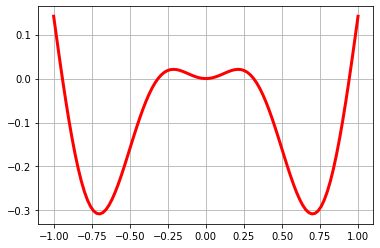

In [9]:
# Plot the function :  input domain as real values between -1 and 1 and calculate the output value for each input value in this linear range. Plot the results to get an idea of how inputs relate to outputs.
inputs  = np.linspace(-1,1,100)
outputs = func(inputs)
plt.plot(inputs,outputs,color='red',lw=3)
plt.grid(True)
plt.show()

### Generation of random samples or points from the function.
Generation of random values between -1 and 1 and calculating the associated output value. 
Repeating this many times will give a sample of points from the function, e.g. “real samples.”

Sampling of the function $ \rightarrow $ real examples for the GAN

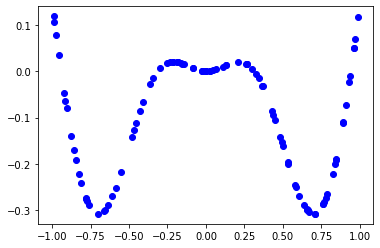

In [10]:
# generate randoms sample from 'func'
def generate_real_samples(n=100,l=-1,h=1):
    # generate random inputs in [l, h]
    X1 = l+(h-l)*np.random.random(size=n)
    # generate outputs ('func' function')
    X2 = func(X1)
    # stack arrays
    X1 = X1.reshape(n, 1)
    X2 = X2.reshape(n, 1)
    X = np.hstack((X1, X2))
    
    #labels
    y = np.ones((n, 1))
    return X, y
 
# generate samples
(plot_data,_) = generate_real_samples()
# plot samples
plt.scatter(plot_data[:, 0], plot_data[:, 1],color='blue')
plt.show()

## 2 - Define a Discriminator Model
The next step is to define the discriminator model.

The model must take a sample from our problem, such as a vector with two elements, and output a classification prediction as to whether the sample is real or fake.

This is a binary classification problem.

    * Inputs: Sample with two real values.
    * Outputs: Binary classification, likelihood the sample is real (or fake).
The problem is very simple, meaning that we don’t need a complex neural network to model it.

The discriminator model will have one hidden layer with 100 nodes and we will use the ReLU activation function and an appropriate weight initialization method called He weight initialization.

The output layer will have one node for the binary classification using the sigmoid activation function.

The model will minimize the binary cross entropy loss function, and the Adam version of stochastic gradient descent will be used because it is very effective.

The discriminator() function below defines and returns the discriminator model. The function parameterizes the number of inputs to expect, which defaults to two.

In [11]:
def discriminator(n_inputs=2, name = None):
    # TODO
    return model

Training the discriminator model is straightforward. The goal is to train a generator model, not a discriminator model, and that is where the complexity of GANs truly lies.

## 3 - Define a Generator Model
The next step is to define the generator model.

The generator model takes as input a point from the latent space and generates a new sample, e.g. a vector with both the input and output elements of our function.

A latent variable is a hidden or unobserved variable, and a latent space is a multi-dimensional vector space of these variables. We can define the size of the latent space for our problem and the shape or distribution of variables in the latent space.

This is because the latent space has no meaning until the generator model starts assigning meaning to points in the space as it learns. After training, points in the latent space will correspond to points in the output space, e.g. in the space of generated samples.

We will define a small latent space of five dimensions and use the standard approach in the GAN literature of using a Gaussian distribution for each variable in the latent space. We will generate new inputs by drawing random numbers from a standard Gaussian distribution, i.e. mean of zero and a standard deviation of one. 

    * Inputs: Point in latent space, e.g. a five-element vector of Gaussian random numbers.
    * Outputs: Two-element vector representing a generated sample for our function (x and func(x)).

The generator model will be small like the discriminator model.

It will have a single hidden layer with fifty nodes and will use the ReLU activation function and the He weight initialization. The output layer will have two nodes for the two elements in a generated vector and will use a linear activation function.

A linear activation function is used because we know we want the generator to output a vector of real values and the scale will be \[-1, 1\] for the first element and about \[-0.32, 0.15\] for the second element.

The model is not compiled. The reason for this is that the generator model is not fit directly.

The generator() function below defines and returns the generator model.

The size of the latent dimension is parameterized in case we want to play with it later, and the output shape of the model is also parameterized, matching the function for defining the discriminator model.

In [12]:
def generator(latent_dim, n_outputs=2, name=None):
	# TODO
	return model

In [13]:
def generate_latent_points(latent_dim, n):
	# TODO
	return x_input

In [14]:
# use the generator to generate n fake examples, with class labels
def generate_fake_samples(generator, latent_dim, n):
	# TODO
	return X, y

## 4 - Training the Generator Model
The weights in the generator model are updated based on the performance of the discriminator model.

When the discriminator is good at detecting fake samples, the generator is updated more, and when the discriminator model is relatively poor or confused when detecting fake samples, the generator model is updated less.

This defines the zero-sum or adversarial relationship between these two models.

There may be many ways to implement this using the Keras API, but perhaps the simplest approach is to create a new model that subsumes or encapsulates the generator and discriminator models.

Specifically, a new GAN model can be defined that stacks the generator and discriminator such that the generator receives as input random points in the latent space, generates samples that are fed into the discriminator model directly, classified, and the output of this larger model can be used to update the model weights of the generator.

To be clear, we are not talking about a new third model, just a logical third model that uses the already-defined layers and weights from the standalone generator and discriminator models.

Only the discriminator is concerned with distinguishing between real and fake examples; therefore, the discriminator model can be trained in a standalone manner on examples of each.

The generator model is only concerned with the discriminator’s performance on fake examples. Therefore, we will mark all of the layers in the discriminator as not trainable when it is part of the GAN model so that they can not be updated and overtrained on fake examples.

When training the generator via this subsumed GAN model, there is one more important change. We want the discriminator to think that the samples output by the generator are real, not fake. Therefore, when the generator is trained as part of the GAN model, we will mark the generated samples as real (class 1).

We can imagine that the discriminator will then classify the generated samples as not real (class 0) or a low probability of being real (0.3 or 0.5). The backpropagation process used to update the model weights will see this as a large error and will update the model weights (i.e. only the weights in the generator) to correct for this error, in turn making the generator better at generating plausible fake samples.

Let’s make this concrete.

    * Inputs: Point in latent space, e.g. a five-element vector of Gaussian random numbers.
    * Outputs: Binary classification, likelihood the sample is real (or fake).

The define_gan() function below takes as arguments the already-defined generator and discriminator models and creates the new logical third model subsuming these two models. The weights in the discriminator are marked as not trainable, which only affects the weights as seen by the GAN model and not the standalone discriminator model.

The GAN model then uses the same binary cross entropy loss function as the discriminator and the efficient Adam version of stochastic gradient descent.


In [15]:
def define_gan(generator, discriminator,name=None):
	# TODO	
	return model

In [16]:
# train the generator and discriminator
def train(g_model, d_model, gan_model, latent_dim, n_epochs=20000, n_batch=128, n_eval=2000):
    # determine half the size of one batch, for updating the discriminator
    half_batch = int(n_batch / 2)
    # manually enumerate epochs
    for i in range(n_epochs):
		
        ######## Step 1 : Update the discriminator
        # prepare real samples
        # TODO
        
        # prepare fake examples
        # TODO

        # update discriminator
        # TODO
        
        ######## Step 2 : Update the generator (by the gan model)  
        # prepare points in latent space as input for the generator
        # TODO

        # create inverted labels for the fake samples
        # TODO

        # update the generator via the discriminator's error
        # TODO
                
        # evaluate the model every n_eval epochs
        if not((i+1) % n_eval) or i==0:
            summarize_performance(i, g_model, d_model, latent_dim)

## 5 - Evaluating the Performance of the GAN

We are interested in the performance of the discriminator model.

Specifically, we are interested to know how well the discriminator model can correctly identify real and fake samples. A good generator model should make the discriminator model confused, resulting in a classification accuracy closer to 50% on real and fake examples.

The summarize_performance() function takes the discriminator and current epoch number as arguments and reports the accuracy on the sample of real and fake examples.

In [17]:
# evaluate the discriminator and plot real and fake points
def summarize_performance(epoch, generator, discriminator, latent_dim, n=100):
	# prepare real samples
    x_real, y_real = generate_real_samples(n)
	# evaluate discriminator on real examples
    _, acc_real = discriminator.evaluate(x_real, y_real, verbose=0)
	# prepare fake examples
    x_fake, y_fake = generate_fake_samples(generator, latent_dim, n)
	# evaluate discriminator on fake examples
    _, acc_fake = discriminator.evaluate(x_fake, y_fake, verbose=0)
	# summarize discriminator performance
    print("Epoch : {} - Discriminator accuracy on real data : {} - Discriminator accuracy on fake data : {} ".format(epoch+1, acc_real, acc_fake))
	# scatter plot real and fake data points
    plt.scatter(x_real[:, 0], x_real[:, 1], color='red')
    plt.scatter(x_fake[:, 0], x_fake[:, 1], color='blue')
    plt.title("Generation of fake samples at epoch {}".format(epoch+1))
    plt.show()



## 6 - Complete Example of Training the GAN

Model: "Discriminator"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               300       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 401
Trainable params: 401
Non-trainable params: 0
_________________________________________________________________
Model: "Generator"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 50)                300       
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 102       
Total params: 402
Trainable params: 402
Non-trainable params: 0
_________________________________________________________________


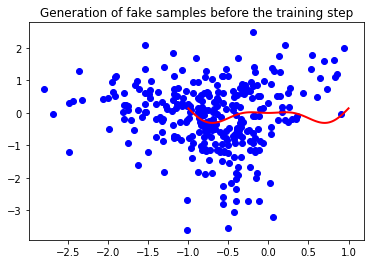

Model: "GAN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Generator (Sequential)       (None, 2)                 402       
_________________________________________________________________
Discriminator (Sequential)   (None, 1)                 401       
Total params: 803
Trainable params: 402
Non-trainable params: 401
_________________________________________________________________
Epoch : 1 - Discriminator accuracy on real data : 0.7599999904632568 - Discriminator accuracy on fake data : 0.4000000059604645 


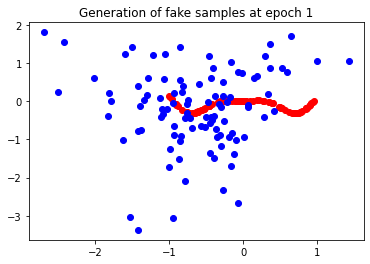

Epoch : 2000 - Discriminator accuracy on real data : 0.8899999856948853 - Discriminator accuracy on fake data : 0.009999999776482582 


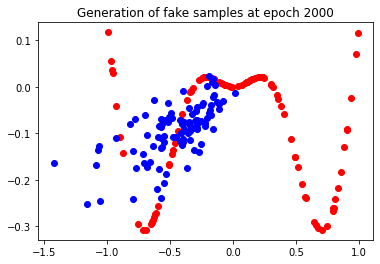

Epoch : 4000 - Discriminator accuracy on real data : 0.5799999833106995 - Discriminator accuracy on fake data : 0.20000000298023224 


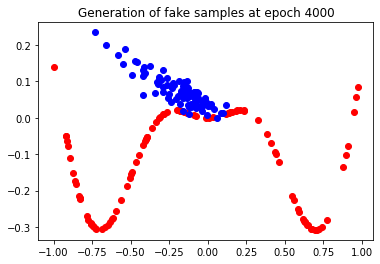

Epoch : 6000 - Discriminator accuracy on real data : 0.20999999344348907 - Discriminator accuracy on fake data : 0.7799999713897705 


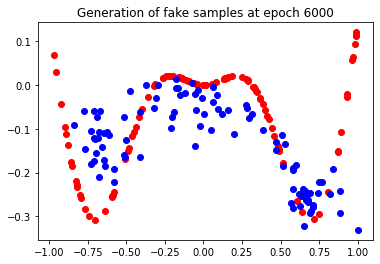

Epoch : 8000 - Discriminator accuracy on real data : 0.5 - Discriminator accuracy on fake data : 0.6600000262260437 


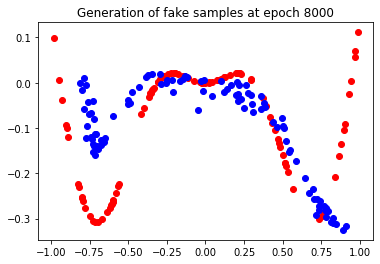

Epoch : 10000 - Discriminator accuracy on real data : 0.7099999785423279 - Discriminator accuracy on fake data : 0.3499999940395355 


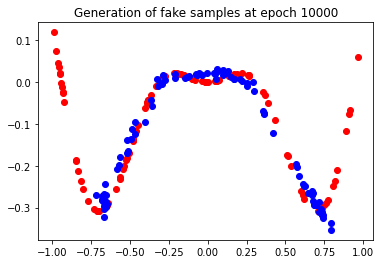

Epoch : 12000 - Discriminator accuracy on real data : 0.4699999988079071 - Discriminator accuracy on fake data : 0.7200000286102295 


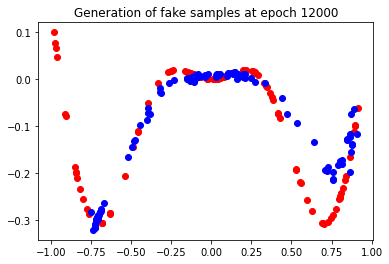

Epoch : 14000 - Discriminator accuracy on real data : 0.44999998807907104 - Discriminator accuracy on fake data : 0.7099999785423279 


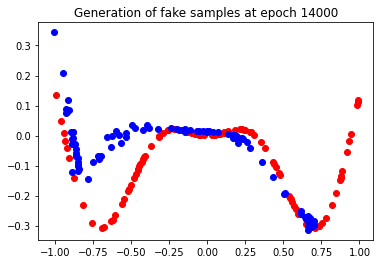

Epoch : 16000 - Discriminator accuracy on real data : 0.6299999952316284 - Discriminator accuracy on fake data : 0.4000000059604645 


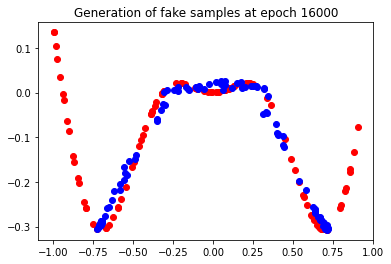

Epoch : 18000 - Discriminator accuracy on real data : 0.47999998927116394 - Discriminator accuracy on fake data : 0.46000000834465027 


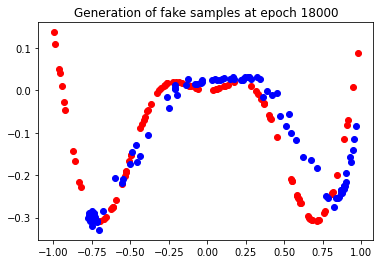

Epoch : 20000 - Discriminator accuracy on real data : 0.6899999976158142 - Discriminator accuracy on fake data : 0.6499999761581421 


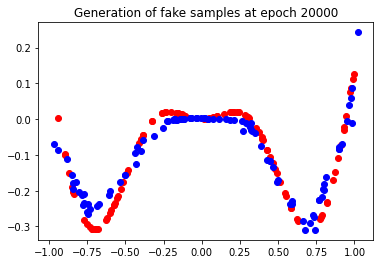

In [18]:
# size of the latent space
latent_dim = 5

# create the discriminator
discriminator_model = discriminator(name='Discriminator')
# summarize the model
discriminator_model.summary()
# plot the model
plot_model(discriminator_model, to_file='discriminator_1D_plot.png', show_shapes=True, show_layer_names=True)

# create the generator
generator_model = generator(latent_dim,name='Generator')
# summarize the model
generator_model.summary()
# plot the model
plot_model(generator_model, to_file='generator_1D_plot.png', show_shapes=True, show_layer_names=True)

# Test of generator before the training step
x,_=generate_fake_samples(generator_model, latent_dim,300)
# scatter plot real and fake data points
plt.scatter(x[:, 0], x[:, 1], color='blue')
plt.plot(inputs,outputs,color='red',lw=2)
plt.title("Generation of fake samples before the training step")
plt.show()

# create the gan
gan_model = define_gan(generator_model, discriminator_model, name='GAN')
# summarize the model
gan_model.summary()
# plot the model
plot_model(gan_model, to_file='gan_1D_plot.png', show_shapes=True, show_layer_names=True)
# train model
train(generator_model, discriminator_model, gan_model, latent_dim)

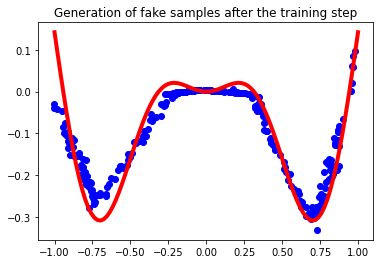

In [38]:
# Test of generator before the training step
fake_info,_=generate_fake_samples(generator_model, latent_dim,300)
# scatter plot real and fake data points
plt.scatter(fake_info[:, 0], fake_info[:, 1], color='blue')
plt.plot(inputs,outputs,color='red',lw=4)
plt.title("Generation of fake samples after the training step")
plt.show()